___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project - EDA

This dataset contains information about used cars.

## Imports
** Import pandas, numpy, matplotlib,and seaborn.**

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Read Ecommerce Customers csv file from the company. 



In [148]:
cardetails = pd.read_csv("Car details v3.csv")

*Check the head of dataset, and check out its info() and describe() methods.**

In [149]:
cardetails.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,130000


In [150]:
cardetails.dtypes

name              object
year               int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
selling_price      int64
dtype: object

In [151]:
cardetails.isna().sum()/len(cardetails*100)

name             0.000000
year             0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
selling_price    0.000000
dtype: float64

In [152]:
cardetails.describe()

,year,km_driven,seats,selling_price
count,8128.000000,8.128000e+03,7907.000000,8.128000e+03
mean,2013.804011,6.981951e+04,5.416719,6.382718e+05
std,4.044249,5.655055e+04,0.959588,8.062534e+05
min,1983.000000,1.000000e+00,2.000000,2.999900e+04
25%,2011.000000,3.500000e+04,5.000000,2.549990e+05
50%,2015.000000,6.000000e+04,5.000000,4.500000e+05
75%,2017.000000,9.800000e+04,5.000000,6.750000e+05
max,2020.000000,2.360457e+06,14.000000,1.000000e+07


In [153]:
cardetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
 12  selling_price  8128 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


#Drop duplicates if any

In [154]:
cardetails.drop_duplicates(inplace=True)

##  Data Cleaning

** Changing the data types 

In [155]:
cardetails['mileage']=cardetails['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')
cardetails['mileage']=cardetails['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
cardetails['engine']=cardetails['engine'].replace(' CC','',regex=True).str.replace(',', '')
cardetails['max_power']=cardetails['max_power'].replace(' bhp','',regex=True).str.replace(',', '')


In [156]:
cardetails['mileage'] = pd.to_numeric(cardetails['mileage'])
cardetails['engine'] = pd.to_numeric(cardetails['engine'])
cardetails['max_power'] = pd.to_numeric(cardetails['max_power'])
cardetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   km_driven      6926 non-null   int64  
 3   fuel           6926 non-null   object 
 4   seller_type    6926 non-null   object 
 5   transmission   6926 non-null   object 
 6   owner          6926 non-null   object 
 7   mileage        6718 non-null   float64
 8   engine         6718 non-null   float64
 9   max_power      6720 non-null   float64
 10  torque         6717 non-null   object 
 11  seats          6718 non-null   float64
 12  selling_price  6926 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 757.5+ KB


## Exploratory Data Analysis
 on the numerical data of the csv file.
___
**Used seaborn to create heatmap and jointplot to compare the Time on Website and Yearly Amount Spent columns. 

In [157]:
cardetails.owner.value_counts()

First Owner             4242
Second Owner            1974
Third Owner              536
Fourth & Above Owner     169
Test Drive Car             5
Name: owner, dtype: int64

In [158]:
cardetails.transmission.value_counts()

Manual       6342
Automatic     584
Name: transmission, dtype: int64

In [159]:
cardetails.seller_type.value_counts()

Individual          6218
Dealer               681
Trustmark Dealer      27
Name: seller_type, dtype: int64

In [160]:
cardetails.fuel.value_counts()

Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: fuel, dtype: int64

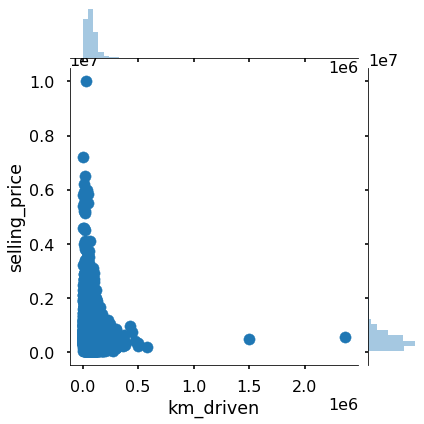

In [161]:
sns.jointplot(x='km_driven',y='selling_price',data=cardetails)

**Explore types of relationships across the entire data set. Used pairplot to recreate the plot below.

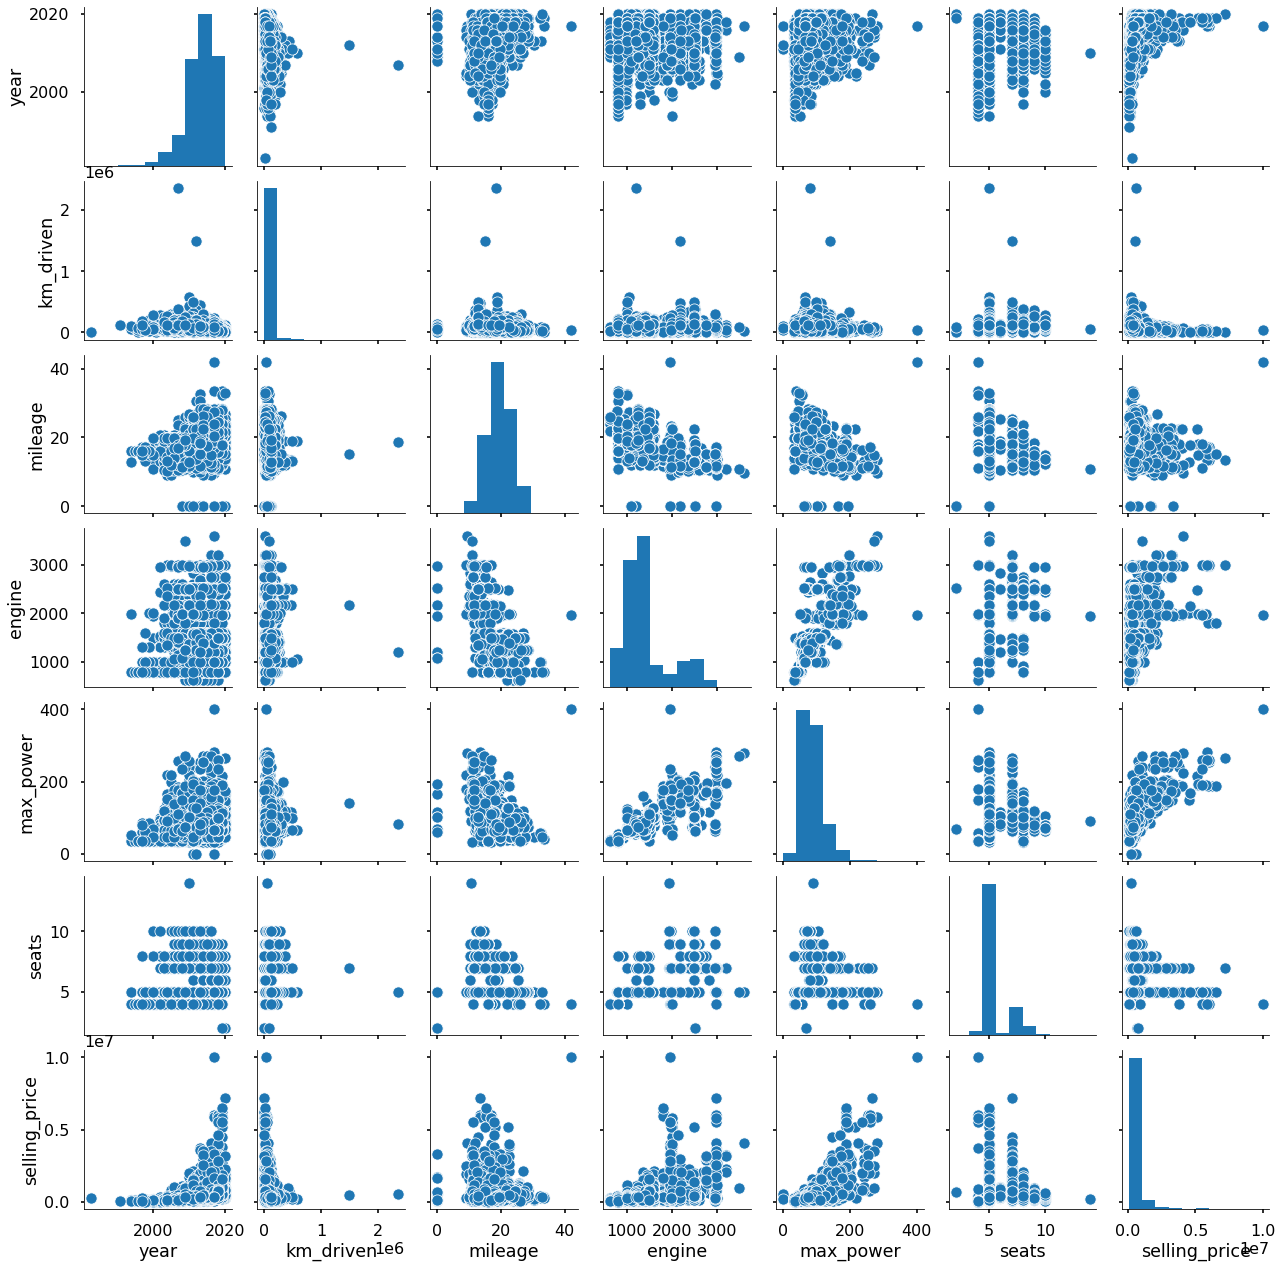

In [162]:
sns.pairplot(cardetails)

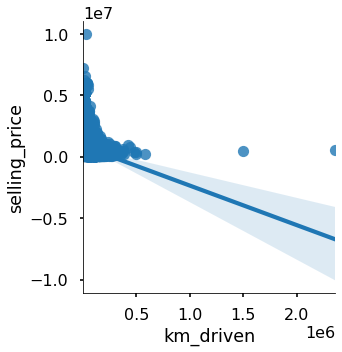

In [163]:
sns.lmplot(x='km_driven',y='selling_price',data=customers)

In [164]:
cardetails.corr()

,year,km_driven,mileage,engine,max_power,seats,selling_price
year,1.000000,-0.377003,0.366694,-0.019074,0.159688,0.023632,0.433076
km_driven,-0.377003,1.000000,-0.196494,0.253339,0.041777,0.207957,-0.165620
mileage,0.366694,-0.196494,1.000000,-0.578483,-0.378609,-0.459624,-0.108344
engine,-0.019074,0.253339,-0.578483,1.000000,0.683506,0.657798,0.442857
max_power,0.159688,0.041777,-0.378609,0.683506,1.000000,0.259028,0.691536
seats,0.023632,0.207957,-0.459624,0.657798,0.259028,1.000000,0.158111
selling_price,0.433076,-0.165620,-0.108344,0.442857,0.691536,0.158111,1.000000


** Encoding categorical variables **

In [165]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cardetails.fuel=le.fit_transform(cardetails.fuel)
cardetails.seller_type=le.fit_transform(cardetails.seller_type)
cardetails.transmission=le.fit_transform(cardetails.transmission)

In [166]:
cardetails.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,1,1,1,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,1,1,1,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,3,1,1,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,1,1,1,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,3,1,1,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,130000


In [167]:
#Checking correlation again after label encoding
cardetails.corr()

,year,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,selling_price
year,1.000000,-0.377003,-0.067323,-0.130527,-0.140995,0.366694,-0.019074,0.159688,0.023632,0.433076
km_driven,-0.377003,1.000000,-0.271970,0.109420,0.118658,-0.196494,0.253339,0.041777,0.207957,-0.165620
fuel,-0.067323,-0.271970,1.000000,0.037424,-0.028296,-0.098198,-0.513824,-0.302946,-0.348209,-0.241328
seller_type,-0.130527,0.109420,0.037424,1.000000,0.181768,-0.007280,-0.071944,-0.183898,0.028470,-0.248659
transmission,-0.140995,0.118658,-0.028296,0.181768,1.000000,0.173511,-0.219556,-0.441296,0.019423,-0.462683
mileage,0.366694,-0.196494,-0.098198,-0.007280,0.173511,1.000000,-0.578483,-0.378609,-0.459624,-0.108344
engine,-0.019074,0.253339,-0.513824,-0.071944,-0.219556,-0.578483,1.000000,0.683506,0.657798,0.442857
max_power,0.159688,0.041777,-0.302946,-0.183898,-0.441296,-0.378609,0.683506,1.000000,0.259028,0.691536
seats,0.023632,0.207957,-0.348209,0.028470,0.019423,-0.459624,0.657798,0.259028,1.000000,0.158111
selling_price,0.433076,-0.165620,-0.241328,-0.248659,-0.462683,-0.108344,0.442857,0.691536,0.158111,1.000000


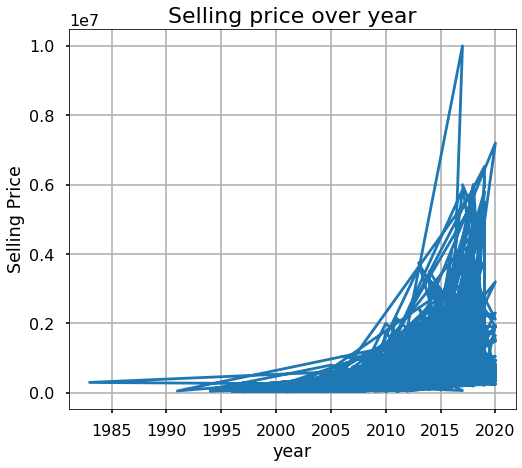

In [168]:
#dfnew = cardetails.select_dtypes(include=np.number)
#sns.heatmap(dfnew)
plt.figure(figsize = (8, 7))

plt.plot(cardetails['year'] ,cardetails.set_index('year')['selling_price'] , label = cardetails['name']  )
plt.xlabel("year")
plt.ylabel("Selling Price")
plt.title("Selling price over year", fontsize=22);
plt.grid('both')


Text(0.5, 1.0, 'Histogram of Mileage')

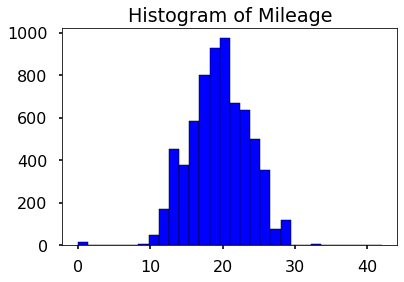

In [169]:
plt.hist(cardetails['mileage'], color = 'blue', edgecolor = 'black',bins = 30)
plt.title('Histogram of Mileage')

Text(0.5, 1.0, 'Histogram of Engine')

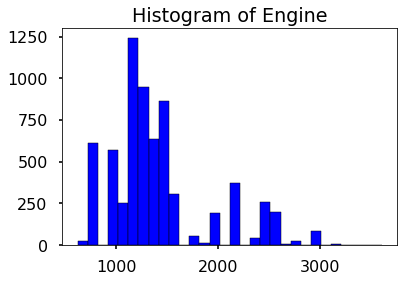

In [170]:
plt.hist(cardetails['engine'], color = 'blue', edgecolor = 'black',bins = 30)
plt.title('Histogram of Engine')

Text(0.5, 1.0, 'Histogram of kilo meter driven')

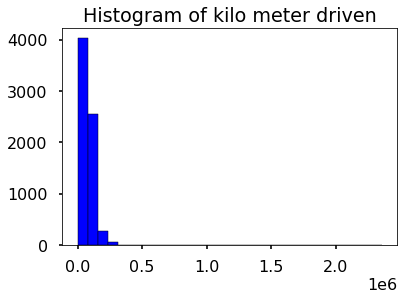

In [171]:
plt.hist(cardetails['km_driven'], color = 'blue', edgecolor = 'black',bins = 30)
plt.title('Histogram of kilo meter driven')

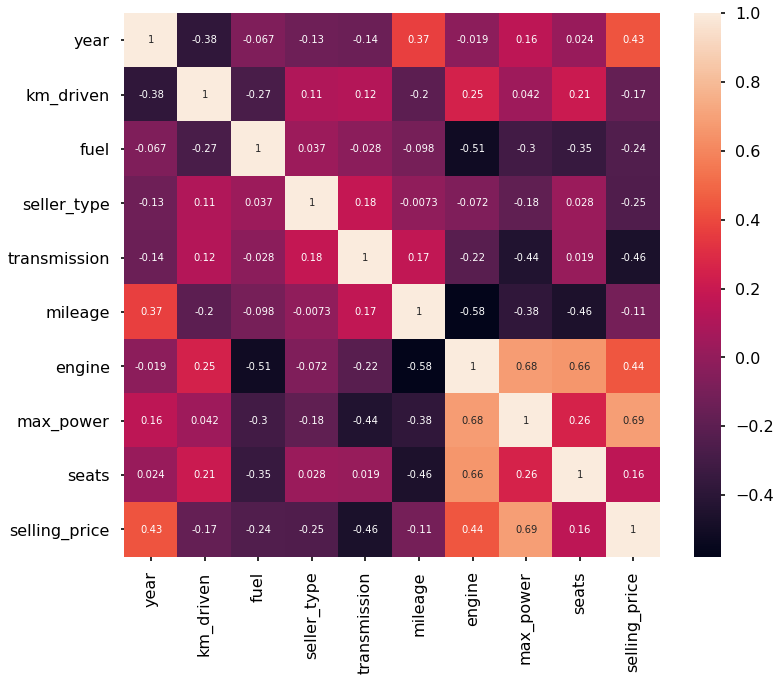

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = cardetails.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)

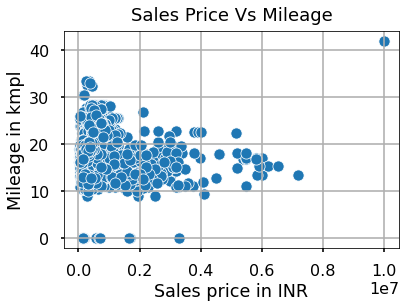

In [173]:
sns.scatterplot( x=cardetails['selling_price'], y=cardetails['mileage'], )
plt.xlabel("Sales price in INR")
plt.ylabel("Mileage in kmpl")
plt.title("Sales Price Vs Mileage", y=1.02, fontsize=18);
plt.grid('both')
from matplotlib import style
style.use('seaborn-poster')

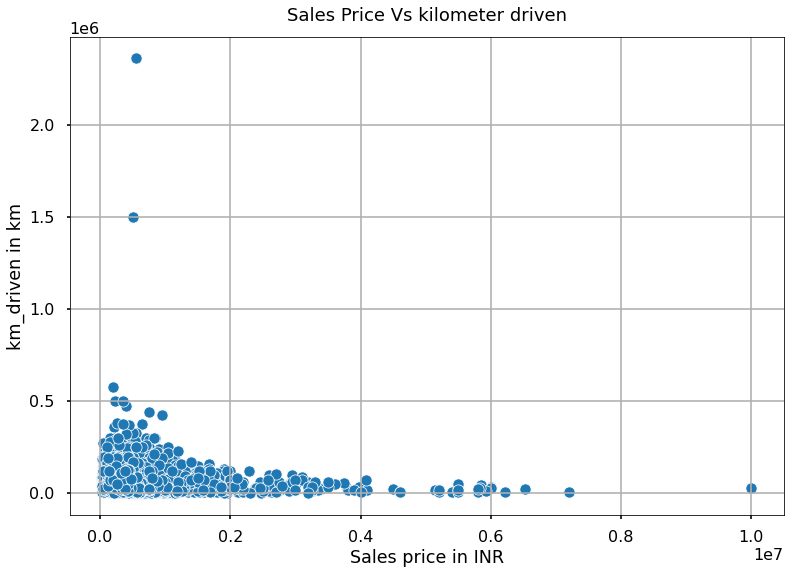

In [174]:
sns.scatterplot( x=cardetails['selling_price'], y=cardetails['km_driven'], )
plt.xlabel("Sales price in INR")
plt.ylabel("km_driven in km")
plt.title("Sales Price Vs kilometer driven", y=1.02, fontsize=18);
plt.grid('both')
from matplotlib import style
style.use('seaborn-poster')